# Anthropic's claude 3.5 sonnet model
In this notebook we will test claude 3.5 sonnet and also its vision capabilities.

In [1]:
from bia_bob import bob
bob.initialize(model="claude-3-5-sonnet-20240620", vision_model="claude-3-5-sonnet-20240620")

First, we load an example image.

In [2]:
%bob load "hela-cells-8bit.tif" and store it in the variable `image`. Also show the image

StackViewNDArray([[[ 3,  6,  1],
                   [ 3,  7,  0],
                   [ 3,  6,  1],
                   ...,
                   [11,  8,  2],
                   [11,  7,  2],
                   [11, 11,  2]],

                  [[ 3,  6,  1],
                   [ 3,  8,  1],
                   [ 3,  7,  1],
                   ...,
                   [11, 10,  2],
                   [10, 10,  2],
                   [11, 11,  2]],

                  [[ 4,  6,  1],
                   [ 3,  6,  1],
                   [ 4,  6,  1],
                   ...,
                   [10, 10,  2],
                   [11, 10,  2],
                   [11, 10,  2]],

                  ...,

                  [[15, 14,  8],
                   [14, 14,  8],
                   [15, 14,  7],
                   ...,
                   [10, 11,  5],
                   [10, 12,  4],
                   [11, 14,  5]],

                  [[14, 16,  7],
                   [16, 15,  7],
                   [15, 16,  8],
                   ...,
                   [10, 11,  4],
                   [11, 13,  4],
                   [11, 16,  5]],

                  [[15, 18,  7],
                   [14, 17,  8],
                   [14, 17,  8],
                   ...,
                   [ 9, 12,  5],
                   [10, 13,  5],
                   [11, 15,  5]]], dtype=uint8)
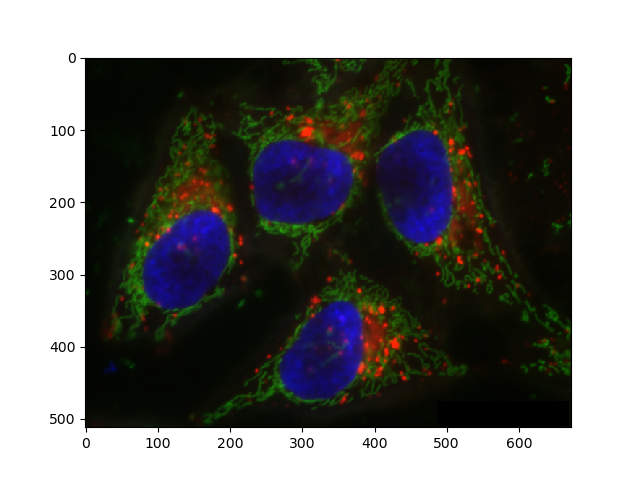
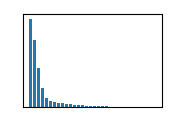

In [3]:
from skimage.io import imread
import stackview
import pyclesperanto_prototype as cle

# Define the image file path
image_path = "hela-cells-8bit.tif"

# Load the image
image = imread(image_path)

# Display the image
stackview.insight(image)

The model has vision capabilities.

In [4]:
%%bob image
what's in this microscopy image? Answer in one short sentence.

This microscopy image shows fluorescently labeled mammalian cells with blue nuclei, green cytoplasmic structures, and red punctate structures or organelles.

This serves as as sanity check if the information about the image content has been stored in memory.

In [5]:
%bob what's again in this image ?

This microscopy image shows fluorescently labeled mammalian cells with blue nuclei, green cytoplasmic structures, and red punctate structures or organelles.

In [6]:
%bob how could I segment the nuclei ?

In [7]:
import numpy as np
from skimage import filters, morphology, measure, segmentation
import pyclesperanto_prototype as cle

# Assuming 'image' is already loaded and is a RGB image
blue_channel = image[:,:,2]  # Extract blue channel

# Apply Gaussian blur
blurred = filters.gaussian(blue_channel, sigma=1)

# Otsu's thresholding
threshold = filters.threshold_otsu(blurred)
binary = blurred > threshold

# Morphological operations
cleaned = morphology.remove_small_objects(binary, min_size=50)
cleaned = morphology.remove_small_holes(cleaned, area_threshold=100)

# Label connected components
labels = measure.label(cleaned)

# Expand labels slightly
expanded_labels = segmentation.expand_labels(labels, distance=2)

# Display results
stackview.curtain(image, expanded_labels)

c:\structure\code\stackview\stackview\_animate.py:61: UserWarning: The image is quite large (> 10 MByte) and might not be properly shown in the notebook when rendered over the internet. Consider subsampling or cropping the image for visualization purposes.
  warnings.warn("The image is quite large (> 10 MByte) and might not be properly shown in the notebook when rendered over the internet. Consider subsampling or cropping the image for visualization purposes.")



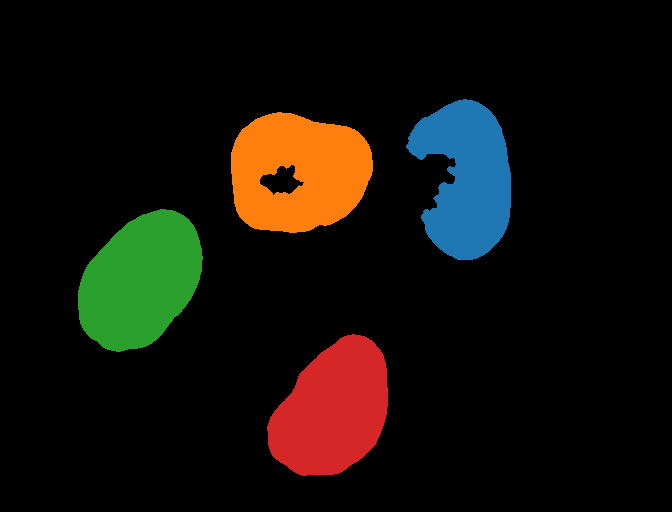

In [8]:
stackview.animate_curtain(image, expanded_labels)